In [26]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Best fit distribution

In [3]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []
    best_distibutions_dic = {}

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)

                except Exception:
                    pass

                # identify if this distribution is better
                best_distibutions_dic[_distn_names[ii]] = (distribution, params, sse)
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])
    #return best_distibutions_dic

In [4]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [5]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

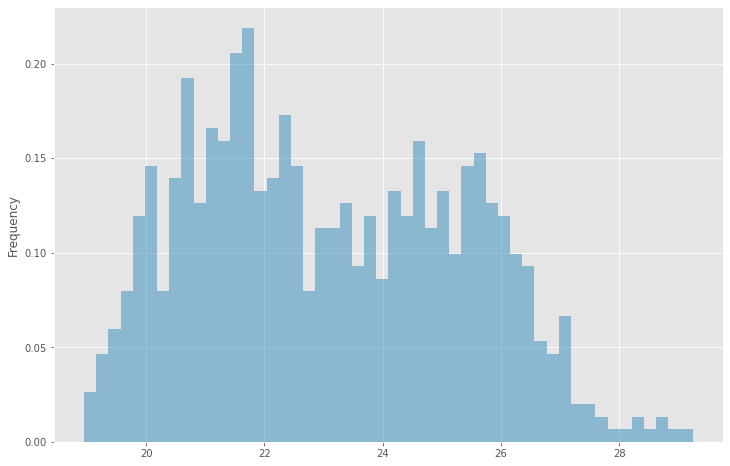

In [76]:
# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

In [7]:
# Save plot limits
dataYLim = ax.get_ylim()

In [8]:
# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

  1 / 104: ksone
  2 / 104: kstwo
  3 / 104: kstwobign
  4 / 104: norm
  5 / 104: alpha
  6 / 104: anglit
  7 / 104: arcsine
  8 / 104: beta
  9 / 104: betaprime
 10 / 104: bradford
 11 / 104: burr
 12 / 104: burr12
 13 / 104: fisk
 14 / 104: cauchy
 15 / 104: chi
 16 / 104: chi2
 17 / 104: cosine
 18 / 104: dgamma
 19 / 104: dweibull
 20 / 104: expon
 21 / 104: exponnorm
 22 / 104: exponweib
 23 / 104: exponpow
 24 / 104: fatiguelife
 25 / 104: foldcauchy
 26 / 104: f
 27 / 104: foldnorm
 28 / 104: weibull_min
 29 / 104: weibull_max
 30 / 104: genlogistic
 31 / 104: genpareto
 32 / 104: genexpon
 33 / 104: genextreme
 34 / 104: gamma
 35 / 104: erlang
 36 / 104: gengamma
 37 / 104: genhalflogistic
 38 / 104: genhyperbolic
 39 / 104: gompertz
 40 / 104: gumbel_r
 41 / 104: gumbel_l
 42 / 104: halfcauchy
 43 / 104: halflogistic
 44 / 104: halfnorm
 45 / 104: hypsecant
 46 / 104: gausshyper
 47 / 104: invgamma
 48 / 104: invgauss
 49 / 104: geninvgauss
 50 / 104: norminvgauss
 51 / 104: 

In [9]:
# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

Text(20.200000000000003, 0.5, 'Frequency')

In [10]:
# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

Text(0, 0.5, 'Frequency')

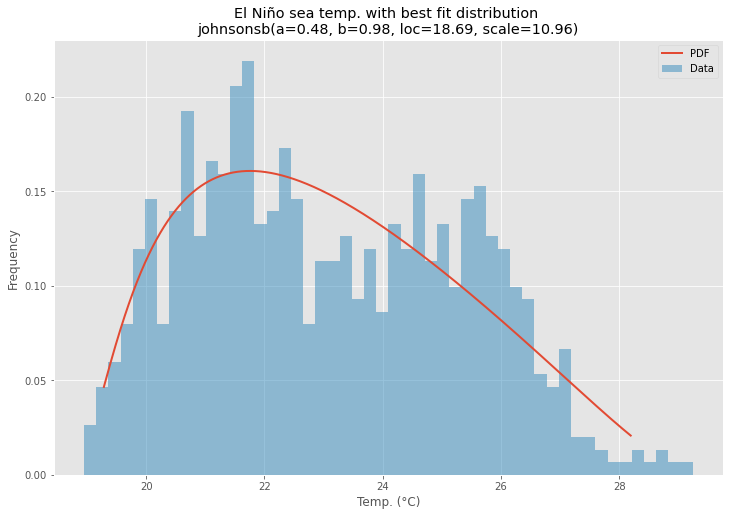

In [11]:
# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [12]:
y, x = np.histogram(data, bins=200, density=True)

In [13]:
x = (x + np.roll(x, -1))[:-1] / 2.0

In [14]:
johnson_dist = getattr(st,"johnsonsb")
johnson_dist

In [15]:
# define the distribution 
params = johnson_dist.fit(data)
params

(0.48180802182650617,
 0.9835826571292925,
 18.689276660398363,
 10.958573456318526)

In [16]:
# finding the arguments
args = params[:-2]
loc = params[-2]
scale = params[-1]

In [17]:
# calculating the pdf for the X random variable
probablity  = johnson_dist.pdf(x,*args,loc = loc,scale =scale)
probablity

array([0.01238052, 0.0173968 , 0.02283954, 0.02856121, 0.03444393,
       0.04039509, 0.04634274, 0.05223156, 0.05801948, 0.06367496,
       0.06917473, 0.0745021 , 0.07964552, 0.0845975 , 0.08935375,
       0.09391246, 0.09827373, 0.1024392 , 0.10641164, 0.11019469,
       0.11379263, 0.11721024, 0.12045259, 0.12352501, 0.12643292,
       0.12918183, 0.13177722, 0.13422455, 0.13652921, 0.13869648,
       0.1407315 , 0.14263931, 0.1444248 , 0.14609267, 0.14764751,
       0.14909374, 0.15043559, 0.15167718, 0.15282245, 0.15387517,
       0.154839  , 0.15571741, 0.15651378, 0.1572313 , 0.15787305,
       0.15844201, 0.15894098, 0.15937269, 0.15973973, 0.16004459,
       0.16028965, 0.1604772 , 0.16060941, 0.16068839, 0.16071613,
       0.16069456, 0.16062551, 0.16051075, 0.16035196, 0.16015076,
       0.1599087 , 0.15962725, 0.15930784, 0.15895183, 0.15856052,
       0.15813517, 0.15767697, 0.15718708, 0.15666658, 0.15611655,
       0.15553798, 0.15493186, 0.1542991 , 0.15364062, 0.15295

0.8222070209376747


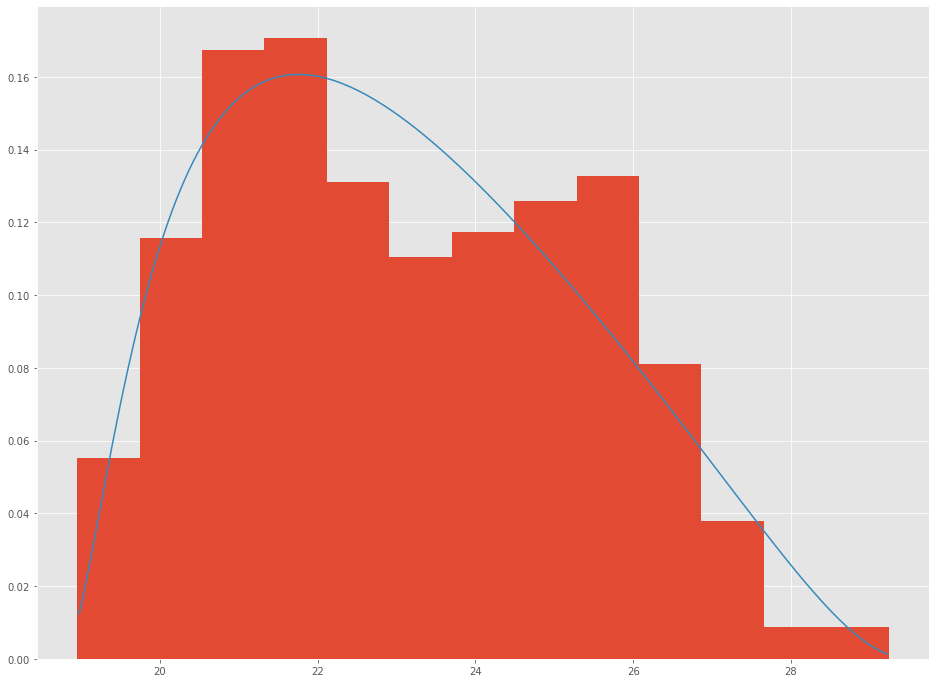

In [92]:
plt.hist(data,bins=cal_bins_freedman_rule(data),density=True)
plt.plot(x,probablity)

In [94]:
data

0      23.11
1      24.20
2      25.37
3      23.86
4      23.03
       ...  
727    19.49
728    19.28
729    19.73
730    20.44
731    22.07
Length: 732, dtype: float64

In [93]:
cal_bins_freedman_rule(data)

0.8222070209376747


13

In [19]:
# to find the best distribution
# Calculate the sse
sse = ((y-probablity)**2).sum()
sse

0.5357835973697368

# To Choose the right bin size

In [77]:
binsize = np.linspace(5,100,6)
binsize

array([  5.,  24.,  43.,  62.,  81., 100.])

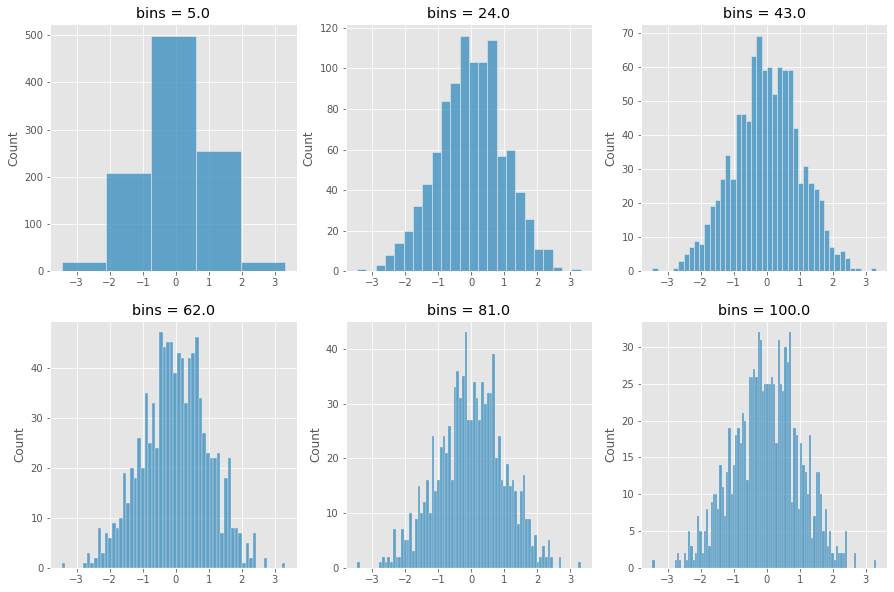

In [78]:
np.random.seed(11)
norm_dist = np.random.normal(size= 1000)

fig,axes  =plt.subplots(2,3,figsize = (15,10))
for ax,bins in zip(axes.flatten(),binsize):
    #print(ax,int(bins))
    sns.histplot(x=norm_dist,bins=int(bins),ax=ax)
    ax.set_title(f"bins = {bins}")

You can see that different bin size show differently the same sample.

So ,Choosing the right bins size of a histogram is nesscary to visulaise the actual distribution

## Sturge's rule

Sturges rule takes into <span class="mark">account the size of the data</span> to decide on the number of bins

$$bins = 1 + ceil(\log_2 (n))$$

n - size of the sample

In [79]:
bins = int(1 +np.ceil(np.log2(len(norm_dist))))
bins

11

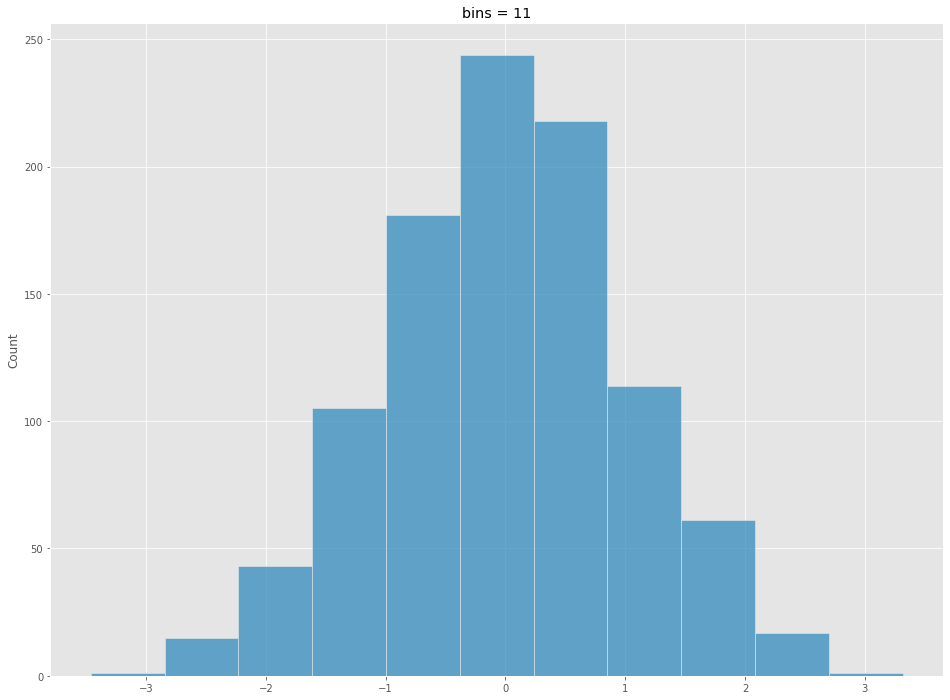

In [80]:
sns.histplot(norm_dist,bins=bins)
plt.title(f"bins = {bins}")
plt.show()

## Freedman-Diaconis Rule

it not only consider the sample size but also account the spread of the data

$$bin width = \frac{2(q3 -q1)}{\sqrt[3]{n}}$$

$$bins = ceil(\frac{max(x) - min(x)}{binswidth})$$

In [81]:
q1 = np.quantile(norm_dist,0.25)
q1

-0.6765083687479201

In [82]:
q3 = np.quantile(norm_dist,0.75)
q3

0.6654369656799368

In [83]:
(q3 - q1)

1.341945334427857

In [84]:
st.iqr(norm_dist,interpolation="midpoint")

1.3436651788519571

In [86]:
binswidth = (2 *(q3 - q1)) / (len(norm_dist)**(1/3))
binswidth

0.2683890668855714

In [87]:
bins = np.ceil((norm_dist.max() - norm_dist.min()) / binswidth)
bins

26.0

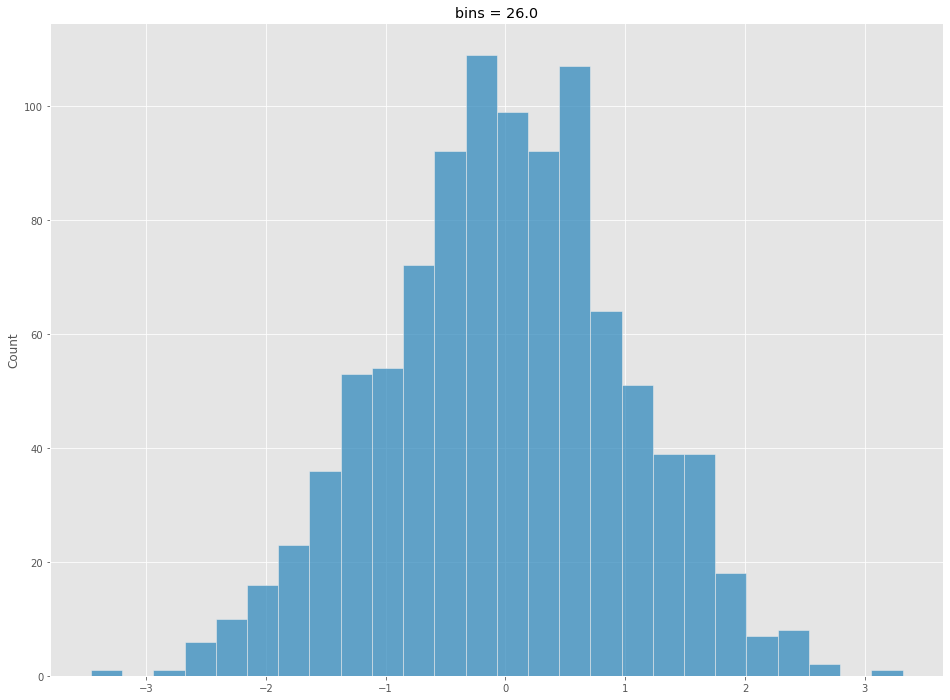

In [88]:
sns.histplot(norm_dist,bins=int(bins))
plt.title(f"bins = {bins}")
plt.show()

In [89]:
def cal_bins_freedman_rule(data):
    iqr = st.iqr(data,interpolation="midpoint")
    binswidth = (2 * iqr) / (len(data)**(1/3))
    print(binswidth)
    return int(np.ceil((data.max() - data.min())/binswidth))

In [90]:
cal_bins_freedman_rule(norm_dist)

0.2687330357703915


26